In [2]:
def add_original_feature(df, df_new):
    df_new['open'] = df['Open']
    df_new['open_1'] = df['Open'].shift(1)
    df_new['close_1'] = df['Close'].shift(1)
    df_new['high_1'] = df['High'].shift(1)
    df_new['low_1'] = df['Low'].shift(1)
    df_new['volume_1'] = df['Volume'].shift(1)
def add_avg_price(df, df_new):
    df_new['avg_price_5'] = df['Close'].rolling(5).mean().shift(1)
    df_new['avg_price_30'] = df['Close'].rolling(21).mean().shift(1)
    df_new['avg_price_365'] = df['Close'].rolling(252).mean().shift(1)
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']
def add_avg_volume(df, df_new):
    df_new['avg_volume_5'] = df['Volume'].rolling(5).mean().shift(1)
    df_new['avg_volume_30'] = df['Volume'].rolling(21).mean().shift(1)
    df_new['avg_volume_365'] = df['Volume'].rolling(252).mean().shift(1)
    df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5'] / df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5'] / df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']
def add_std_price(df, df_new):
    df_new['std_price_5'] = df['Close'].rolling(5).std().shift(1)
    df_new['std_price_30'] = df['Close'].rolling(21).std().shift(1)
    df_new['std_price_365'] = df['Close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']
def add_std_volume(df, df_new):
    df_new['std_volume_5'] = df['Volume'].rolling(5).std().shift(1)
    df_new['std_volume_30'] = df['Volume'].rolling(21).std().shift(1)
    df_new['std_volume_365'] = df['Volume'].rolling(252).std().shift(1)
    df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] = df_new['std_volume_30'] / df_new['std_volume_365']
def add_return_feature(df, df_new):
    df_new['return_1'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift(5)) / df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close'] - df['Close'].shift(21)) / df['Close'].shift(21)).shift(1)
    df_new['return_365'] = ((df['Close'] - df['Close'].shift(252)) / df['Close'].shift(252)).shift(1)
    df_new['moving_avg_5'] = df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30'] = df_new['return_1'].rolling(21).mean().shift(1)
    df_new['moving_avg_365'] = df_new['return_1'].rolling(252).mean().shift(1)
def generate_features(df):
    df_new = pd.DataFrame()
    add_original_feature(df, df_new)
    add_avg_price(df, df_new)
    add_avg_volume(df, df_new)
    add_std_price(df, df_new)
    add_std_volume(df, df_new)
    add_return_feature(df, df_new)
    df_new['close'] = df['Close']
    df_new = df_new.dropna(axis=0)
    return df_new


In [8]:
import pandas as pd
data_raw = pd.read_csv('19880101_20191231-smaller5.csv', index_col='Date')
data = generate_features(data_raw)
data_train = data.loc['1988-01-01':'2018-12-31']
data_test = data.loc['2019-01-01':'2019-12-31']
X_train = data_train.drop('close', axis=1).values
y_train = data_train['close'].values
X_test = data_test.drop('close', axis=1).values
y_test = data_test['close'].values
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 37)
(1004,)
(251, 37)
(251,)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
param_grid = {"alpha": [1e-4, 3e-4, 1e-3],"eta0": [0.01, 0.03, 0.1],}
lr = SGDRegressor(penalty='l2', max_iter=1000, random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42),
             param_grid={'alpha': [0.0001, 0.0003, 0.001],
                         'eta0': [0.01, 0.03, 0.1]},
             scoring='r2')

In [12]:
print(grid_search.best_params_)
lr_best = grid_search.best_estimator_
predictions_lr = lr_best.predict(X_scaled_test)

{'alpha': 0.001, 'eta0': 0.1}


In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

print(f'MSE: {mean_squared_error(y_test, predictions_lr):.3f}')
print(f'MAE: {mean_absolute_error(y_test, predictions_lr):.3f}')
print(f'R^2: {r2_score(y_test, predictions_lr):.3f}')

MSE: 40843.124
MAE: 154.683
R^2: 0.964


In [15]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {'max_depth': [30, 50],'min_samples_split': [2, 5, 10],'min_samples_leaf': [3, 5]}
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1,max_features='auto', random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [30, 50], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [16]:
print(grid_search.best_params_)
rf_best = grid_search.best_estimator_
predictions_rf = rf_best.predict(X_test)

{'max_depth': 50, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [17]:
print(f'MSE: {mean_squared_error(y_test, predictions_rf):.3f}')
print(f'MAE: {mean_absolute_error(y_test, predictions_rf):.3f}')
print(f'R^2: {r2_score(y_test, predictions_rf):.3f}')

MSE: 407247.776
MAE: 413.069
R^2: 0.645


In [19]:
from sklearn.svm import SVR
param_grid = [{'kernel': ['linear'], 'C': [500],'epsilon': [0.0001]}]
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [500], 'epsilon': [0.0001],
                          'kernel': ['linear']}],
             scoring='r2')

In [20]:
print(grid_search.best_params_)
svr_best = grid_search.best_estimator_
predictions_svr = svr_best.predict(X_scaled_test)
print(f'MSE: {mean_squared_error(y_test, predictions_svr):.3f}')
print(f'MAE: {mean_absolute_error(y_test, predictions_svr):.3f}')
print(f'R^2: {r2_score(y_test, predictions_svr):.3f}')

{'C': 500, 'epsilon': 0.0001, 'kernel': 'linear'}
MSE: 44589.416
MAE: 175.859
R^2: 0.961


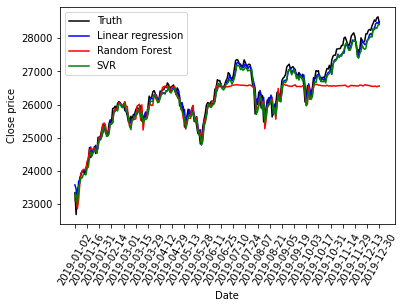

In [21]:
import matplotlib.pyplot as plt
plt.plot(data_test.index, y_test, c='k')
plt.plot(data_test.index, predictions_lr, c='b')
plt.plot(data_test.index, predictions_rf, c='r')
plt.plot(data_test.index, predictions_svr, c='g')
plt.xticks(range(0, 252, 10), rotation=60)
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(['Truth', 'Linear regression', 'Random Forest', 'SVR'])
plt.show()